In [23]:
### 1 importar librerias
### supervision
### tareas de clasificacion y regrescion

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
### visualizar el arbol
import pydotplus
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn import tree

%matplotlib notebook


In [19]:
df = pd.read_csv("glass.csv", sep=",")

In [38]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Preprocesamiento

In [26]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [27]:
# verificar si existen datos NaN
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [29]:
# etiquetas o lables existen en el dataset
df["Type"].nunique()


6

In [32]:
x = df.iloc[:, :9].values
y = df.iloc[:,9].values

In [36]:
x = StandardScaler().fit_transform(x)
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

# dividir dataset entre training y testing set


##### Se selecciona aleateariamente el 70% training y el 30% testing

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

# Modelo arbol de deciciosn

In [48]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Prediccion

In [49]:
y_pred = clf.predict(X_test)

# Calculo accuracy

In [51]:
print("Accuracy :", metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy : 78.46153846153847 %


# visualizacion del arbol

In [52]:
fn = ["RI", "NA", "MG", "AI", "Si", "K", "Ca", "Ba", "Fe"]
cn = ['buildingwindowsfloatprocessed','buildingwindowsnonfloatprocessed',
      'vehiclewindowsfloatprocessed','containers','tableware','headlamps']
cn

['buildingwindowsfloatprocessed',
 'buildingwindowsnonfloatprocessed',
 'vehiclewindowsfloatprocessed',
 'containers',
 'tableware',
 'headlamps']

<IPython.core.display.Javascript object>


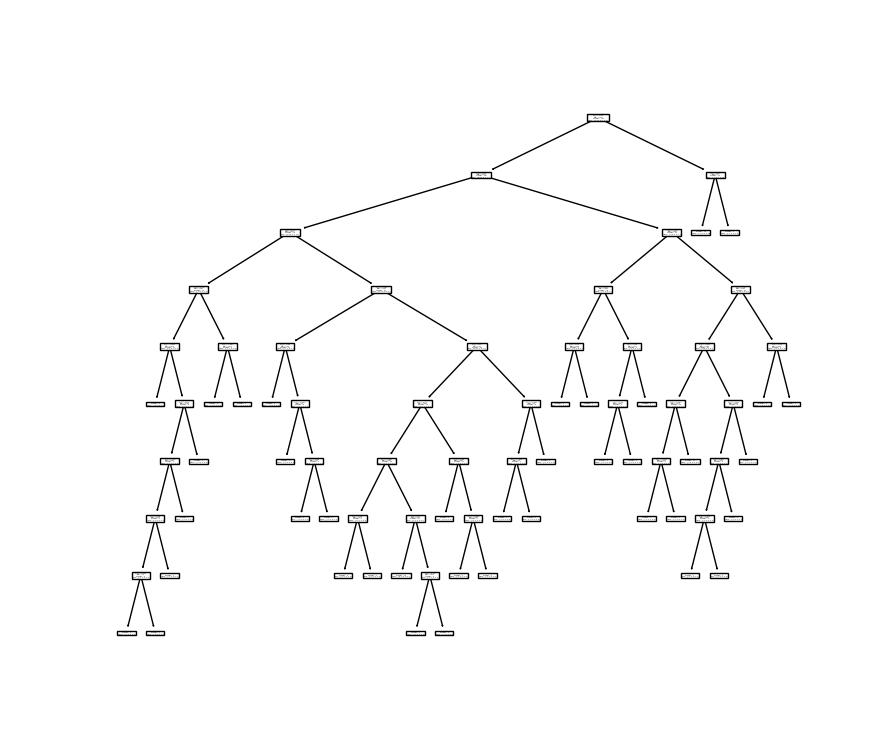

[Text(0.7008463541666666, 0.95, 'X[7] <= 0.322\ngini = 0.727\nsamples = 149\nvalue = [49, 55, 8, 9, 7, 21]'),
 Text(0.5319010416666666, 0.85, 'X[3] <= -0.02\ngini = 0.673\nsamples = 130\nvalue = [48, 55, 8, 9, 7, 3]'),
 Text(0.2565104166666667, 0.75, 'X[2] <= 0.466\ngini = 0.601\nsamples = 78\nvalue = [43, 23, 6, 1, 3, 2]'),
 Text(0.125, 0.65, 'X[1] <= 0.445\ngini = 0.625\nsamples = 16\nvalue = [1, 9, 0, 1, 3, 2]'),
 Text(0.08333333333333333, 0.55, 'X[3] <= -0.542\ngini = 0.514\nsamples = 12\nvalue = [1, 8, 0, 1, 0, 2]'),
 Text(0.0625, 0.45, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0, 0, 0]'),
 Text(0.10416666666666667, 0.45, 'X[5] <= 0.143\ngini = 0.722\nsamples = 6\nvalue = [1, 2, 0, 1, 0, 2]'),
 Text(0.08333333333333333, 0.35, 'X[3] <= -0.13\ngini = 0.625\nsamples = 4\nvalue = [1, 2, 0, 1, 0, 0]'),
 Text(0.0625, 0.25, 'X[8] <= 0.648\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0, 0, 0, 0]'),
 Text(0.041666666666666664, 0.15, 'X[2] <= -0.528\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 

In [53]:
tree.plot_tree(clf)

In [65]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,
                                filled=True, rounded=True,
                                special_characters=True) 
graph = graphviz.Source(dot_data)  
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH